# Data Visualization

In this tutorial, we'll compare visualization techniques between base R and the `tidyverse`, specifically focusing on `ggplot2`. We'll start with base R to understand foundational plotting capabilities, highlighting their simplicity but also limitations in customization and complexity. Then, we'll transition to `ggplot2`, showcasing its enhanced flexibility, aesthetic options, and ability to handle layered information more effectively. This comparison aims to demonstrate the evolution from basic to advanced visualization techniques, underscoring the power of `ggplot2` within the `tidyverse` for sophisticated data analysis and presentation.

In [2]:
# Load the tidyverse package, a collection of R packages for data science
library(tidyverse)

# Load the nycflights13 package, which includes the flights dataset
library(nycflights13)


## R Base Visualization

Starting with R base visualization techniques allows us to appreciate the foundation upon which packages like ggplot2 build to offer enhanced capabilities for data visualization. Using the flights dataset from the nycflights13 package, we can explore how to visualize data using base R and then transition to demonstrating the power and flexibility of ggplot2

### Plotting a Histogram of Departure Delays
This creates a basic histogram of departure delays with 30 bins. Although revealing, the chart is elementary and offers limited flexibility for adding layers or customizing visual elements.




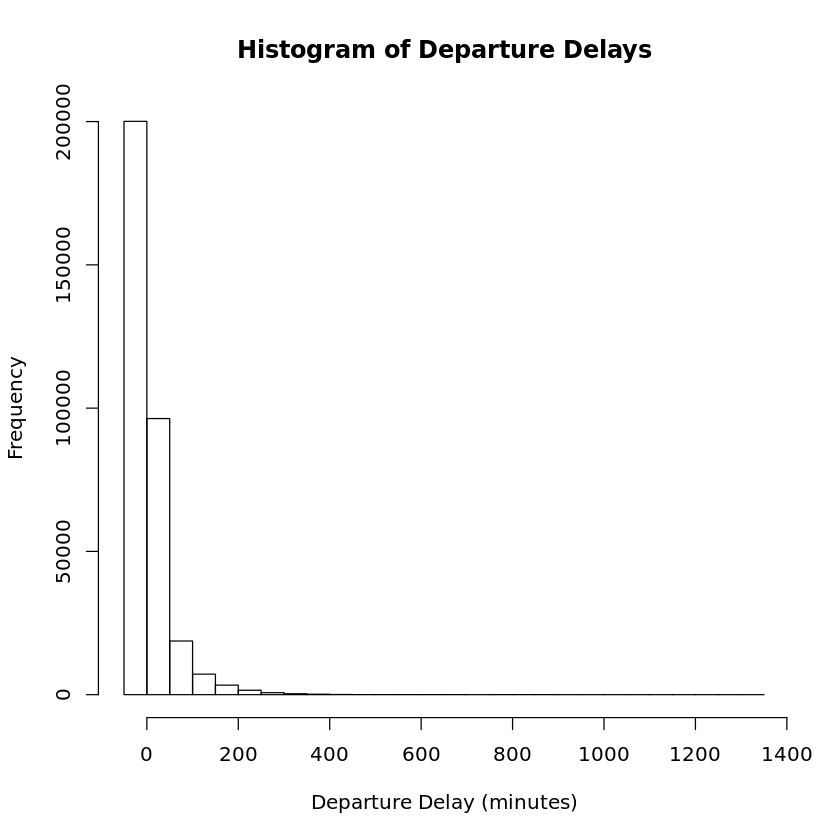

In [3]:
hist(flights$dep_delay, breaks = 30, main = "Histogram of Departure Delays", xlab = "Departure Delay (minutes)")


### Boxplot of Departure Delays by Carrier

This produces a boxplot to compare the distribution of departure delays among carriers.
Drawback: Customizing and incorporating extra details (such as the total flights for each carrier) is challenging..

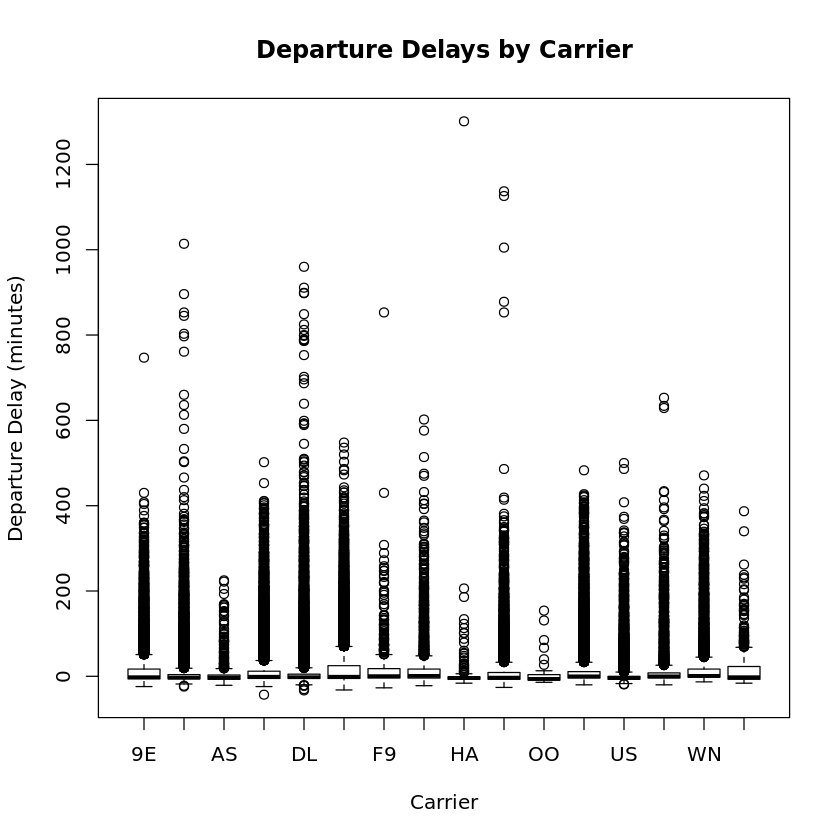

In [4]:
boxplot(dep_delay ~ carrier, data = flights, xlab = "Carrier", ylab = "Departure Delay (minutes)", main = "Departure Delays by Carrier")


### Scatter Plot for Departure vs. Arrival Delays

This scatter plot shows the relationship between departure and arrival delays.
Limitation: Hard to layer more information or perform grouping by another variable, such as carrier.

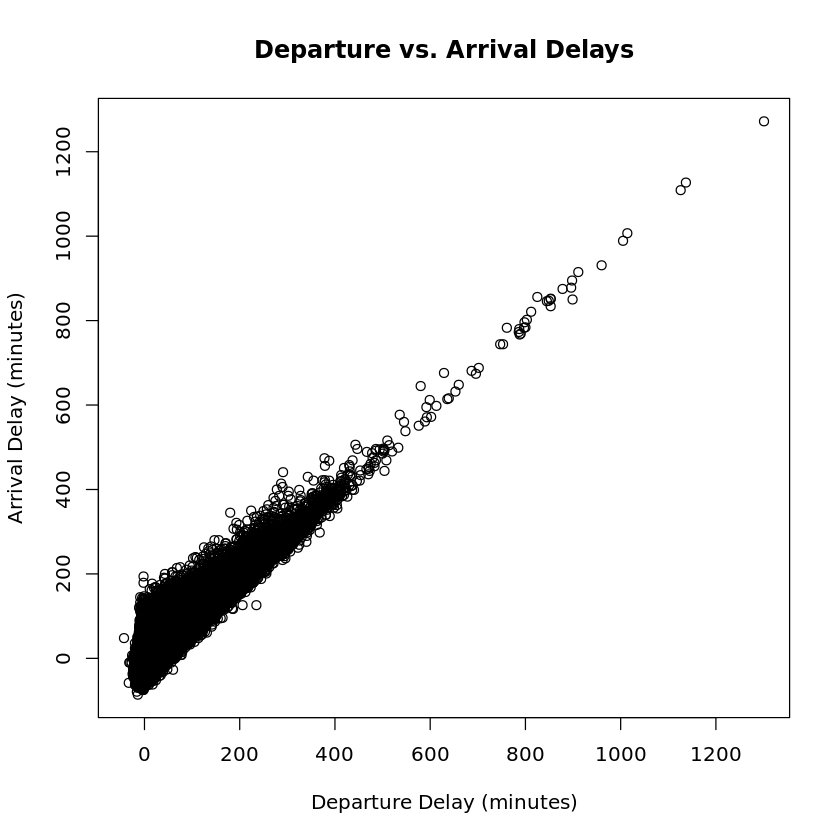

In [5]:
plot(flights$dep_delay, flights$arr_delay, xlab = "Departure Delay (minutes)", ylab = "Arrival Delay (minutes)", main = "Departure vs. Arrival Delays")


## Transition to ggplot2
After demonstrating the basics with R's base plotting system, you can highlight its limitations, especially in terms of flexibility, ease of customization, and aesthetic appeal. This sets the stage for introducing ggplot2, a powerful library that allows for creating complex and multi-layered graphics with clearer syntax and enhanced visual appeal

## Grammar of Graphics 

The Grammar of Graphics is a concept central to the design and functionality of ggplot2, providing a cohesive system for creating and understanding data visualizations. It decomposes graphs into semantic components such as scales, layers, and aesthetics, allowing users to articulate complex graphical representations from data. 
Here is the following list of core components in ggplot2, focusing on the essentials that form the backbone of any visualization.

- **Data**: The foundation of any `ggplot2` plot, specifying the dataset that contains the variables you want to visualize.

- **Aesthetics (aes)**: Defines how data are mapped to visual properties like axes (x, y), colors, shapes, or sizes. Aesthetics link data to the visual elements, indicating, for example, that a variable should be represented on the x-axis or that another variable should define the color of points.

- **Geometries (geom)**: The geometric shapes that represent data points on the graph, such as bars in a bar chart (`geom_bar`), points in a scatter plot (`geom_point`), or lines in a line graph (`geom_line`). Each geom function adds a layer to the plot, allowing the data to be represented in various visual forms.

- **Scales**: Control the mapping from data to aesthetics. Scales translate data into visual elements, adjusting how data points are calculated and displayed on the axes, how colors are chosen, or how sizes are varied. They provide the tools to customize the presentation, like using a logarithmic scale for an axis or a specific color palette for a categorical variable.

- **Coordinate Systems**: Define how data points are positioned on the plot, with Cartesian coordinates being the most common, but others like polar coordinates are available for specific chart types like pie charts.

- **Facets**: Allow for the creation of small multiples, splitting data into subsets and displaying each subset in its own panel or plot. This is powerful for comparing patterns across different groups or levels within a dataset.

- **Statistical Transformations (stat)**: Used to perform on-the-fly transformations of data, such as binning data into histograms (`stat_bin`) or fitting a line to a scatter plot (`stat_smooth`). These transformations enable `ggplot2` to compute new values from your data for the purpose of plotting.

- **Themes**: Control the non-data ink on a plot, including background, grid lines, and text elements. Themes can be used to customize the appearance of a plot, making it more readable or aesthetically pleasing.


### Creating a Scatter Plot
To examine the relationship between departure and arrival delays, this plot employs geom_point to generate a scatter plot, utilizing alpha to modify point transparency.

Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”


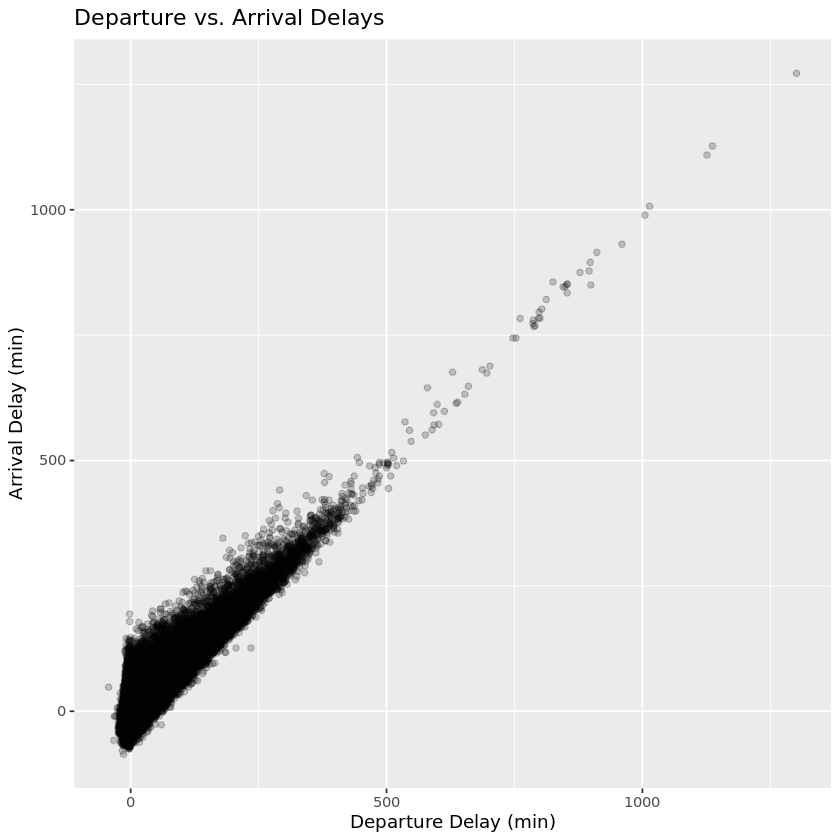

In [8]:
ggplot(data = flights, aes(x = dep_delay, y = arr_delay)) +
  geom_point(alpha = 0.2) +
  labs(title = "Departure vs. Arrival Delays", x = "Departure Delay (min)", y = "Arrival Delay (min)")


Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”


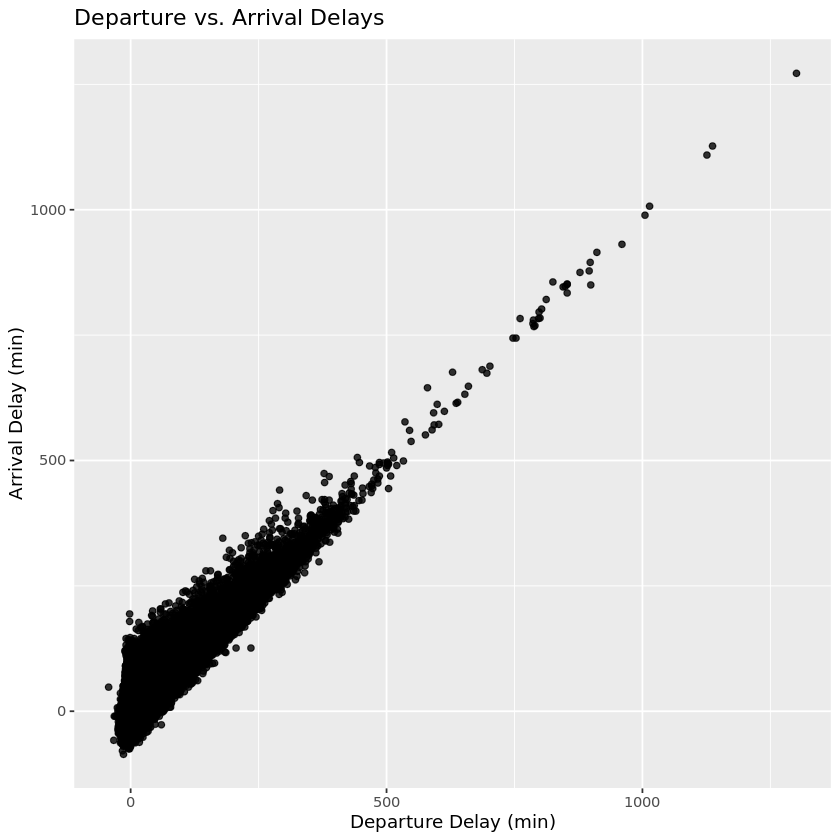

In [3]:
ggplot(data = flights, aes(x = dep_delay, y = arr_delay)) +
  geom_point(alpha = 0.8) +
  labs(title = "Departure vs. Arrival Delays", x = "Departure Delay (min)", y = "Arrival Delay (min)")


### Adding Layers and Customizing

Layers are incorporated using +, allowing the addition of statistical summaries, like a smooth line:

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 9430 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”


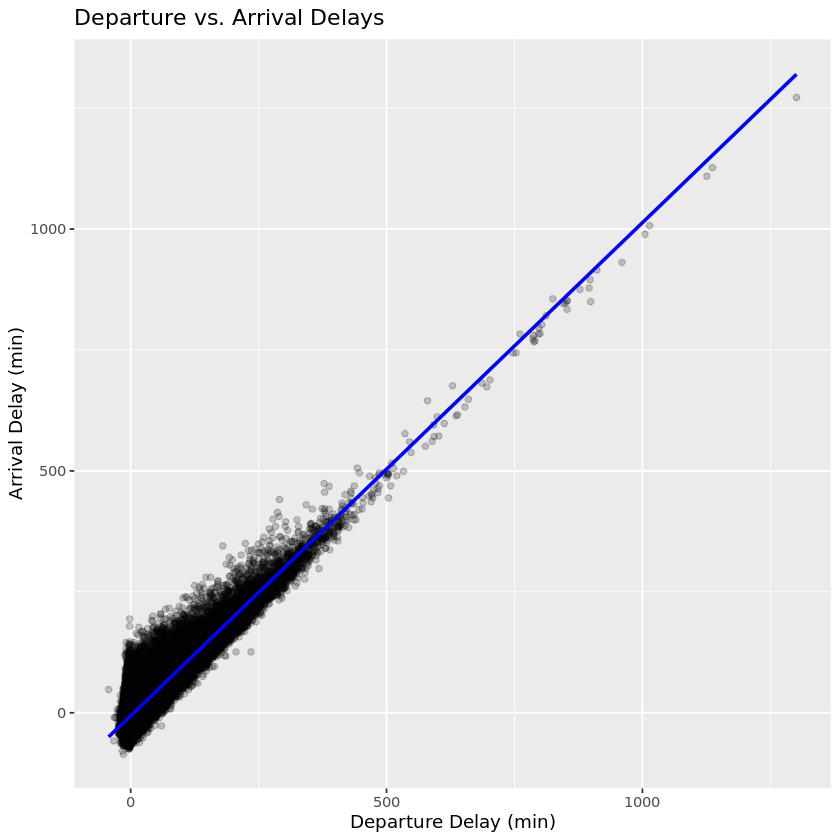

In [10]:
ggplot(data = flights, aes(x = dep_delay, y = arr_delay)) +
  geom_point(alpha = 0.2) +
  labs(title = "Departure vs. Arrival Delays", x = "Departure Delay (min)", y = "Arrival Delay (min)") +
  geom_smooth(method = "lm", color = "blue")



These layers were outlined in the Grammar of Graphics sections. Here, you can explore the potential layers to be added.

### Exploring Different Geoms: Bar Plots for Categorical Data


Bar plots are a common visualization technique used to represent categorical data, particularly when comparing the distribution or summary statistics of different categories. In the context of the flight dataset, we can use bar plots to visualize the average departure delay by carrier, providing insights into the punctuality performance of each airline.

The `geom_bar()` function in ggplot2 is used to create bar plots. When the stat parameter is set to "identity", it tells `geom_bar()` that the heights of the bars should be taken from the data directly, rather than computing a summary statistic within ggplot2. This is particularly useful when the data has already been summarized beforehand, as is the case here where we have pre-summarized the average delay for each carrier using `group_by()` and `summarize()`.

Here's a breakdown of the code::

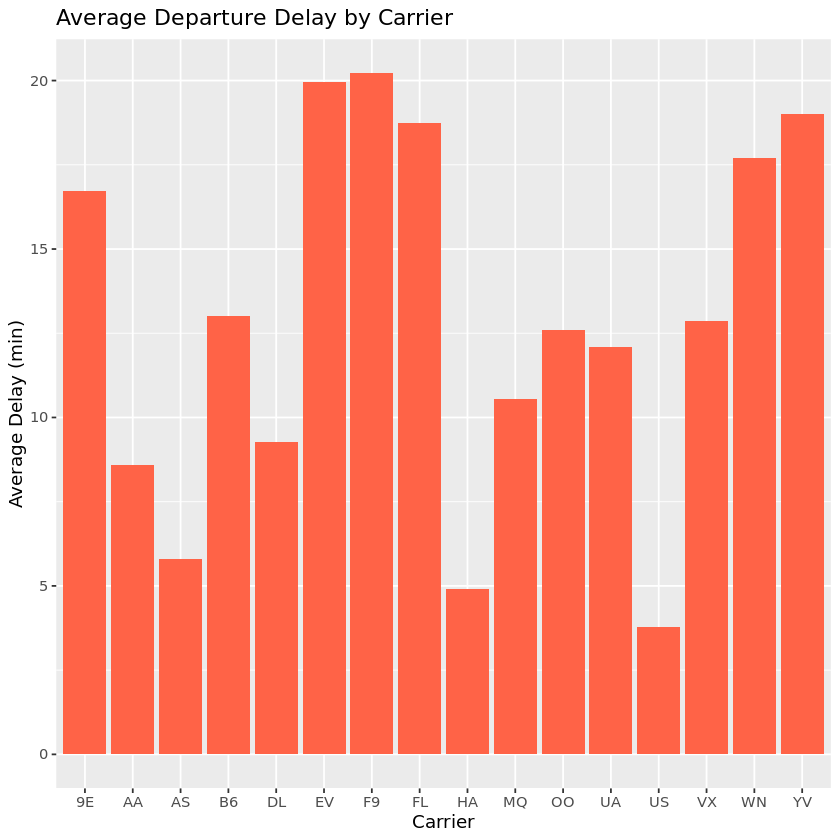

In [11]:
flights %>%
  group_by(carrier) %>%
  summarize(avg_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = carrier, y = avg_delay)) +
  geom_bar(stat = "identity", fill = "tomato") +
  labs(title = "Average Departure Delay by Carrier", x = "Carrier", y = "Average Delay (min)")


- `flights %>%`: Begins the data manipulation chain, indicating that we're working with the flights dataset.
- `group_by(carrier) %>% summarize(avg_delay = mean(dep_delay, na.rm = TRUE))`: Groups the data by carrier and calculates the average departure delay for each carrier using `summarize()`.
- `ggplot(aes(x = carrier, y = avg_delay))`: Initializes a ggplot object, specifying the aesthetics mapping carrier to the x-axis and avg_delay to the y-axis.
- `geom_bar(stat = "identity", fill = "tomato")`: Adds a bar layer to the plot, specifying "identity" as the statistical transformation to use the pre-computed average delays for each carrier. The `fill` parameter sets the fill color of the bars to "tomato".
- `labs(title = "Average Departure Delay by Carrier", x = "Carrier", y = "Average Delay (min)")`: Sets the plot title and axis labels.


### Scales and Themes
Scales control how data values are mapped to visual properties. For instance, adjusting the color scale for a factor variable allows for more meaningful visual differentiation among categories. An example of this is using `scale_fill_brewer(palette = "Paired")`, which applies a specific color palette to the fill aesthetic.:

Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


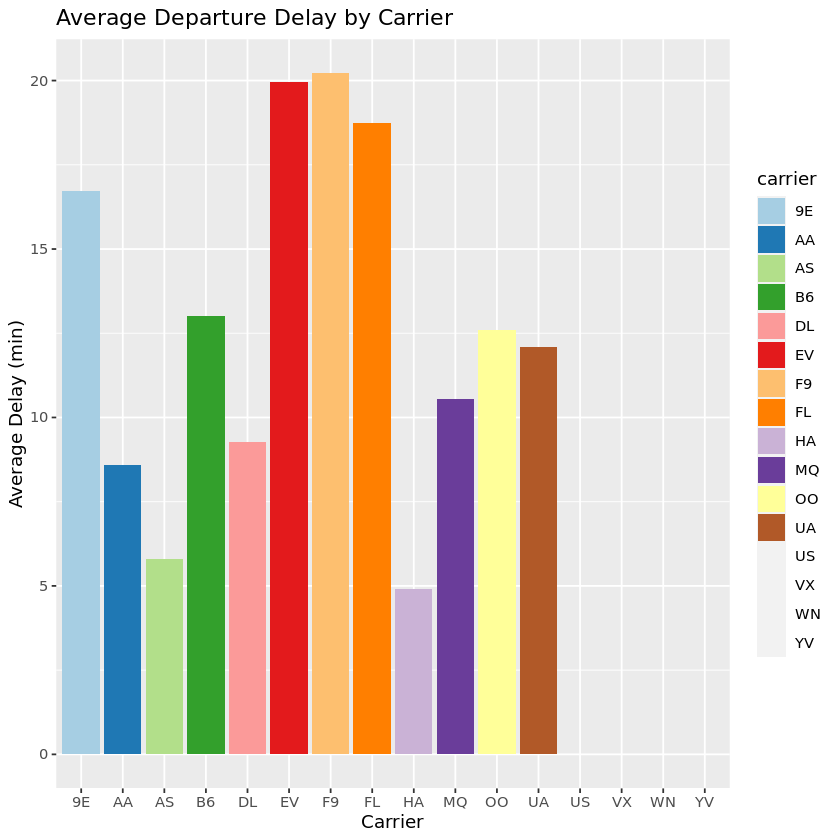

In [15]:
flights %>%
  group_by(carrier) %>%
  summarize(avg_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = carrier, y = avg_delay, fill = carrier)) + # Added fill aesthetic
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Paired") + # This line applies the color palette
  labs(title = "Average Departure Delay by Carrier", x = "Carrier", y = "Average Delay (min)")


### Customizing with Themes
Themes in `ggplot2` allow for fine-grained customization of the visual appearance of plots. By applying different themes, you can adjust various aspects of the plot such as background color, grid lines, text size, and font styles to match your preferences or the requirements of your presentation or publication.

For example, the `theme_minimal()` function applies a minimalist theme to the plot, removing unnecessary clutter and emphasizing the data. Additionally, the `theme()` function allows you to further customize specific elements of the plot. In the provided example:

- `theme(text = element_text(size = 12)` sets the global text size to 12 points, ensuring consistency in text appearance throughout the plot.
- `axis.title.x = element_text(face = "bold"))` boldens the x-axis title, making it stand out more prominently and enhancing readability.

These theme adjustments can significantly impact the overall look and feel of the plot, helping to convey your data effectively and make a visual impact on your audience.





Warning message in RColorBrewer::brewer.pal(n, pal):
“n too large, allowed maximum for palette Paired is 12
Returning the palette you asked for with that many colors
”


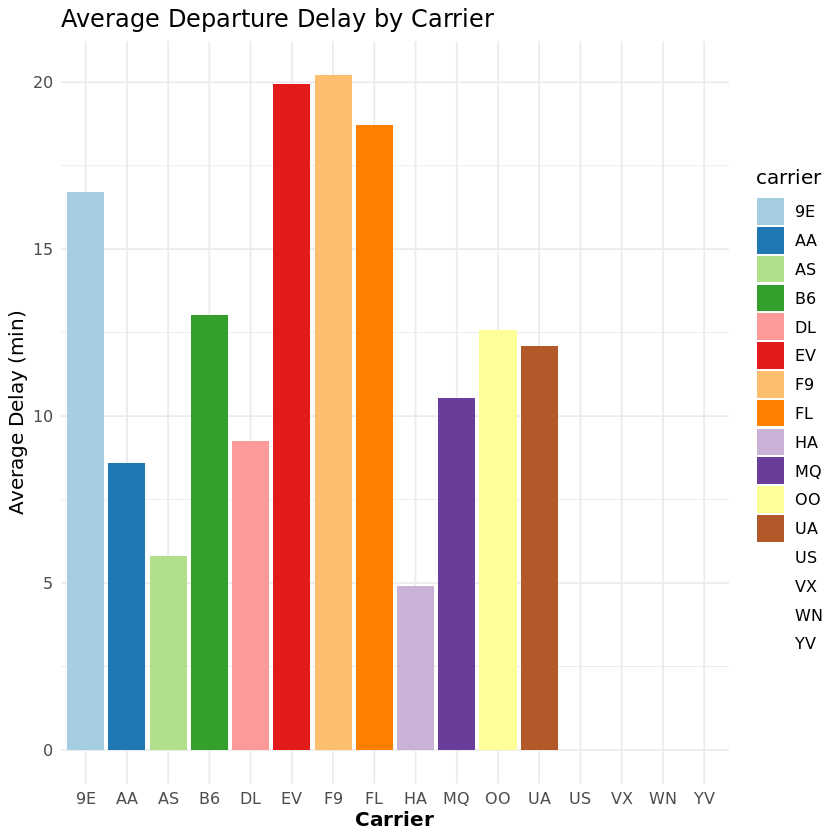

In [17]:
flights %>%
  group_by(carrier) %>%
  summarize(avg_delay = mean(dep_delay, na.rm = TRUE)) %>%
  ggplot(aes(x = carrier, y = avg_delay, fill = carrier)) + # Added fill aesthetic for demonstration
  geom_bar(stat = "identity") +
  scale_fill_brewer(palette = "Paired") + # Applies the color palette
  labs(title = "Average Departure Delay by Carrier", x = "Carrier", y = "Average Delay (min)") +
  theme_minimal() + # Applies the minimal theme
  theme(text = element_text(size = 12), # Customizes global text size
        axis.title.x = element_text(face = "bold")) # Boldens the x-axis title


### Faceting for Multivariate Analysis
Faceting in `ggplot2` allows for multivariate analysis by creating multiple plots based on a factor variable. This technique is useful for exploring relationships between variables across different subgroups. In the provided code example, separate scatter plots are created for each carrier, with departure time on the x-axis and arrival delay on the y-axis. Each plot represents data for a specific airline, enabling easy comparison of arrival delay patterns. The `facet_wrap()` function is used to generate a grid of plots, organizing them by carrier. Adjustments such as setting transparency with `alpha = 0.1` using `geom_point()` ensure that overlapping points are visually distinguishable.


Warning message:
“Removed 9430 rows containing missing values (`geom_point()`).”


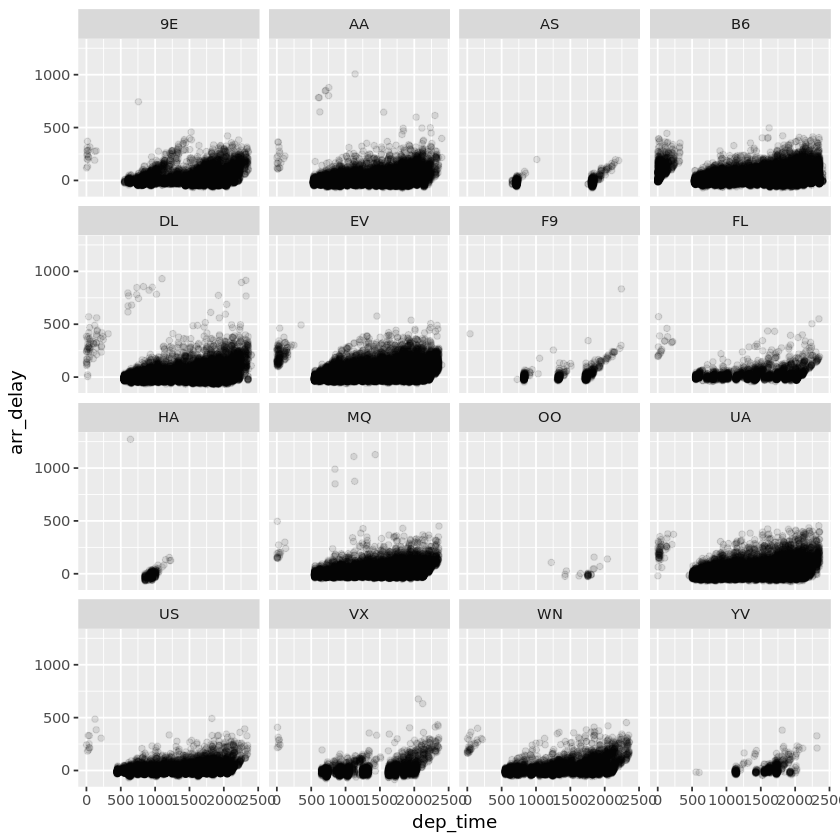

In [22]:
ggplot(data = flights, aes(x = dep_time, y = arr_delay)) +
  geom_point(alpha = 0.1) +
  facet_wrap(~carrier)


## Why Understanding the Grammar of Graphics Matters for Your Data Visualization Journey


The Grammar of Graphics is important because it offers a structured approach to visualization that promotes clarity, precision, and flexibility. By understanding these components, users can:

- **Compose Complex Visualizations**: Layering different geoms and stats allows for the construction of sophisticated plots that can reveal deeper insights into the data.

- **Customize Visualizations**: Through scales and themes, users can tailor the appearance of plots to suit their needs, whether for exploratory data analysis or publication.

- **Reproduce and Extend Plots**: The structured approach makes it easier to reproduce existing visualizations or adapt them to new datasets or questions.

- **Enhance Communication**: By carefully mapping data to visual properties, users can create more effective visualizations that communicate findings clearly and compellingly.
llingly.